## 인공신경망

### 패키지 호출

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

### 폰트 적용

In [90]:
# 그래픽 한글폰트 적용
matplotlib.rc("font", family = "AppleGothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

### 데이터 불러오기

In [91]:
df_raw = pd.read_csv('/Users/2circlejun/Desktop/포스텍/과제/빅데이터/실습화일/2. Big Data 분석/유방암.csv', encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### 이상치 확인


In [92]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

### 데이터 기술통계량 및 형태 파악

In [93]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

#### 모든 데이터에 결측값이 존재하지 않고 데이터 타입도 float으로 통일되어있다.

In [94]:
df_raw.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,15.709703,20.323250,103.050469,807.735937,0.099358,0.123252,0.122144,0.066977,0.186772,0.062679,...,18.542406,27.225594,123.221625,1133.463438,0.137678,0.308713,0.352927,0.145487,0.305097,0.087156
std,3.745788,4.150729,25.835984,391.969297,0.014249,0.057207,0.084822,0.041732,0.027485,0.007190,...,5.182210,6.050052,35.960154,640.979627,0.023316,0.175225,0.214449,0.067292,0.069367,0.020076
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.026750,0.000000,0.000000,0.127400,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.085670,0.050360,0.000000,0.000000,0.156500,0.055040
25%,13.050000,17.460000,84.845000,523.900000,0.090240,0.081132,0.052770,0.029538,0.166900,0.057450,...,14.657500,23.275000,95.525000,653.525000,0.122675,0.180275,0.182950,0.090868,0.258700,0.073475
50%,15.125000,20.215000,100.100000,713.050000,0.098570,0.115300,0.110850,0.065265,0.184650,0.061445,...,17.730000,26.880000,118.850000,969.200000,0.138050,0.276950,0.339750,0.152700,0.295800,0.082640
75%,18.520000,22.500000,121.550000,1075.250000,0.108050,0.155650,0.169550,0.091777,0.202700,0.066705,...,22.420000,30.937500,148.850000,1538.500000,0.151200,0.405675,0.483675,0.197100,0.328125,0.097745
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


#### 유방암 양성 음성 비율

In [95]:
df_raw.diagnosis.value_counts(normalize = True)

음성    0.6625
양성    0.3375
Name: diagnosis, dtype: float64

#### 양성 1, 음성 0으로 변환하는 함수 작성

In [96]:
def diag(x):
    if x == "음성":
        return 0
    else:
        return 1

In [97]:
# diagnosis열이 '음성', '양성' 을 정수에 대입시켜 변환시켜준다
df_raw['diagnosis'] = df_raw['diagnosis'].apply(diag)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


#### 데이터 분할

- 문제에 명시된 대로 train/ test dataset을 6:4로 나눠준다

In [98]:
df_raw_x = df_raw.drop('diagnosis', axis= 1, inplace= False)
df_raw_y = df_raw['diagnosis']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size= 0.4, random_state=1234)

In [99]:
print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(192, 30)
(192,)
(128, 30)
(128,)


### MLP Classifier

In [100]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x, df_train_y)
print('Accuracy on traing set: {:.3f}'.format(nn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on traing set: 0.599
Accuracy on test set: 0.758


In [101]:
nn_uncustomized.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1234,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### MLPClassifier모델 Parameter 변경

#### 1. 은닉층 변경에 따른 모델

In [102]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# c: 규제(0.01,0.1,1,10,100)
para_hidden = [5 * hidden for hidden in range(1, 21)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
df_accuracy_hidden.round(3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.599,0.758
1,10,0.594,0.750
2,15,0.401,0.242
3,20,0.901,0.875
4,25,0.870,0.898
5,30,0.599,0.758
6,35,0.932,0.914
7,40,0.599,0.758
8,45,0.938,0.938
9,50,0.932,0.906


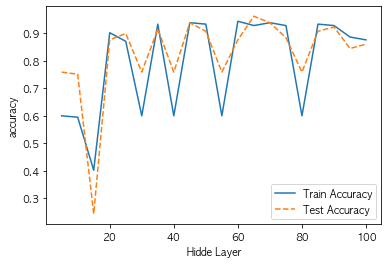

In [103]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_hidden,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("Hidde Layer"); plt.ylabel("accuracy")
plt.legend()

#### 2. 활성화 함수에 따른 모델 성능

In [104]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation= v_function, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 결과 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivaitionFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

df_accuracy_function.round(3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivaitionFunction,TrainAccuracy,TestAccuracy
0,logistic,0.943,0.898
1,tanh,0.943,0.906
2,relu,0.599,0.758


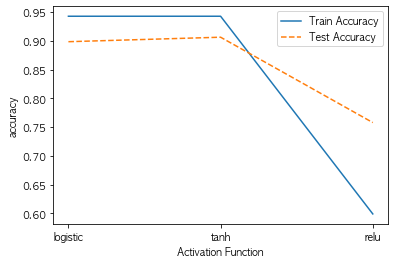

In [105]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_function, test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("Activation Function"); plt.ylabel("accuracy")
plt.legend()

### 각 매개변수 별 평균의 범위가 너무 넓기 때문에 스케일링을 진행한 후 모델을 재생성한다.

### 스케일링 적용

In [106]:
# 변수명 저장
v_feature_name = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [107]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.4, random_state=1234)

print("train data size : {}".format(df_scaled_train_x.shape))
print("test data size : {}".format(df_scaled_test_x.shape))

train data size : (192, 30)
test data size : (128, 30)


In [108]:
# 모델 생성
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# Test 데이터 정확도 
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.953


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 새 모델 생성

In [109]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# c: 규제(0.01,0.1,1,10,100)
para_hidden = [5 * hidden for hidden in range(1, 21)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.953,0.891
1,10,0.984,0.938
2,15,0.984,0.922
3,20,0.984,0.945
4,25,0.995,0.961
5,30,1.000,0.953
6,35,0.995,0.945
7,40,1.000,0.938
8,45,1.000,0.953
9,50,1.000,0.945


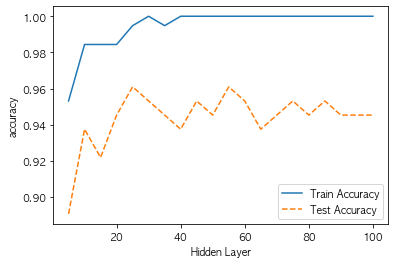

In [110]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("Hidden Layer"); plt.ylabel("accuracy")
plt.legend()

In [111]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# c: 규제(0.01,0.1,1,10,100)
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation= v_function,hidden_layer_sizes=(25,25), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 결과 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivaitionFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
df_accuracy_function.round(3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivaitionFunction,TrainAccuracy,TestAccuracy
0,logistic,0.990,0.945
1,tanh,0.995,0.945
2,relu,0.995,0.961


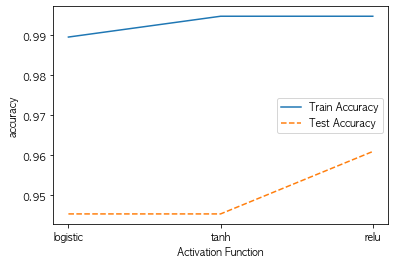

In [112]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_function, test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("Activation Function"); plt.ylabel("accuracy")
plt.legend()

In [113]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# c: 규제(0.01,0.1,1,10,100)
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver:
    nn = MLPClassifier(solver =v_solver ,activation= 'relu', hidden_layer_sizes=(25,25), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 결과 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
df_accuracy_solver.round(3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.969
1,sgd,0.953,0.883
2,adam,0.995,0.961


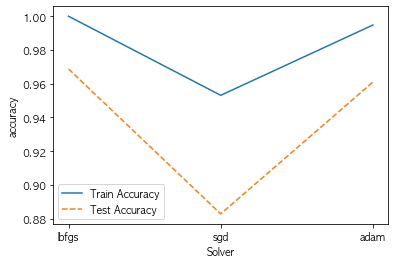

In [114]:
# 모델 정확도 그래프 확인
plt.plot(para_solver, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_solver, test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("Solver"); plt.ylabel("accuracy")
plt.legend()

In [115]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# c: 규제(0.01,0.1,1,10,100)
para_batch = [20 * batch for batch in range(1, 10)]

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size= v_batch ,solver ='adam' , activation= 'relu', hidden_layer_sizes=(25,25), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 결과 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
df_accuracy_batch.round(3)

[20, 40, 60, 80, 100, 120, 140, 160, 180]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.000,0.961
1,40,1.000,0.961
2,60,1.000,0.961
3,80,0.995,0.961
4,100,0.995,0.961
5,120,0.995,0.961
6,140,0.995,0.961
7,160,0.995,0.961
8,180,0.995,0.953


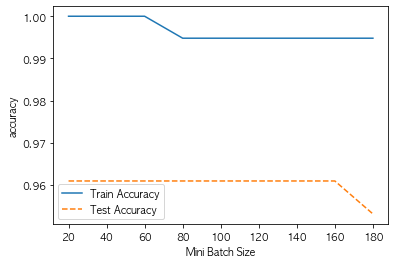

In [116]:
# 모델 정확도 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("Mini Batch Size"); plt.ylabel("accuracy")
plt.legend()

### 최종 모델 생성

In [181]:
# 최종 모델
nn_final = MLPClassifier(batch_size = 80,hidden_layer_sizes=(25,25), activation='relu', solver='adam', random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)
# train 모델 정확도
print("Accuracy on training set: {0:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {0:.3f}".format(nn_final.score(df_scaled_test_x, df_test_y)))
# Confusion Matrix
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)), "\n")
# 목표변수의 빈도 불균형: f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set: 0.995
Accuracy on test set: 0.961
Confusion Matrix: 
[[92  5]
 [ 0 31]] 

              precision    recall  f1-score   support

           0      1.000     0.948     0.974        97
           1      0.861     1.000     0.925        31

    accuracy                          0.961       128
   macro avg      0.931     0.974     0.949       128
weighted avg      0.966     0.961     0.962       128



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


1에대한 recall은 1로 성능이 매우 뛰어난 것을 알 수 있다.

In [184]:
pred = nn_final.predict(df_raw_x)
(pred == df_raw_y).sum()

212

## KNN

### 동일한 HMEQ 데이터를 사용하기 때문에 전처리 과정을 생략함

#### 기본 옵션으로 모델 생성

In [157]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on traing set: {:.3f}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on traing set: 0.932
Accuracy on test set: 0.914


In [158]:
knn_uncustomized.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### MLPClassifier모델 Parameter 변경

#### 1. 이웃수 증가에 따른 모델

In [159]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

# c: 규제(0.01,0.1,1,10,100)
para_n_neighbors = [i for i in range(3,31)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 결과 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
df_accuracy_neighbors.round(3)

,neighbors,TrainAccuracy,TestAccuracy
0,3,0.932,0.898
1,4,0.911,0.891
2,5,0.932,0.914
3,6,0.927,0.914
4,7,0.927,0.898
5,8,0.922,0.914
6,9,0.911,0.906
7,10,0.911,0.906
8,11,0.917,0.906
9,12,0.917,0.906


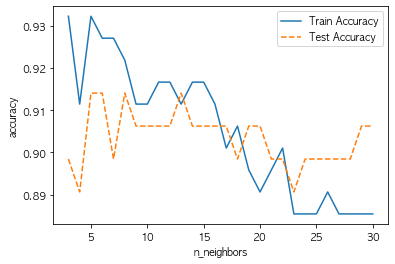

In [160]:
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_n_neighbors,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("n_neighbors"); plt.ylabel("accuracy")
plt.legend()

#### 2. 가중치별 이웃 수 증가에 따른 정확도 변화

총 3개의 이웃에서 30개의 이웃까지 28개의 이웃을 기준으로 가중치를 계산한다   

In [166]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(3,31)] * 2

para_weight = (['uniform'])* 28 + (['distance']) * 28
### uniform 가중치와 distance

for(v_n_neighbors, v_weight) in zip(para_n_neighbors, para_weight):
    knn = KNeighborsClassifier(n_neighbors= v_n_neighbors, weights= v_weight)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))



# 결과 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weight
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,3,uniform,0.932,0.898
1,4,uniform,0.911,0.891
2,5,uniform,0.932,0.914
3,6,uniform,0.927,0.914
4,7,uniform,0.927,0.898
5,8,uniform,0.922,0.914
6,9,uniform,0.911,0.906
7,10,uniform,0.911,0.906
8,11,uniform,0.917,0.906
9,12,uniform,0.917,0.906


In [167]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index='Neighbors', columns= 'Weights', values= ['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
3                   1.0  0.932292     0.898438  0.898438
4                   1.0  0.911458     0.898438  0.890625
5                   1.0  0.932292     0.914062  0.914062
6                   1.0  0.927083     0.929688  0.914062
7                   1.0  0.927083     0.890625  0.898438
8                   1.0  0.921875     0.906250  0.914062
9                   1.0  0.911458     0.914062  0.906250
10                  1.0  0.911458     0.929688  0.906250
11                  1.0  0.916667     0.914062  0.906250
12                  1.0  0.916667     0.906250  0.906250
13                  1.0  0.911458     0.906250  0.914062
14                  1.0  0.916667     0.906250  0.906250
15                  1.0  0.916667     0.906250  0.906250
16                  1.0  0.911458     0.906250  0.906250
17                  1.0  0.901042     0.906250  0.906250
18                  1.0  0.906250     0.898438  0.898438
19                  1.0  0.895833     0.898438  0.906250
20                  1.0  0.890625     0.906250  0.906250
21                  1.0  0.895833     0.898438  0.898438
22                  1.0  0.901042     0.906250  0.898438
23                  1.0  0.885417     0.906250  0.890625
24                  1.0  0.885417     0.906250  0.898438
25                  1.0  0.885417     0.898438  0.898438
26                  1.0  0.890625     0.906250  0.898438
27                  1.0  0.885417     0.906250  0.898438
28                  1.0  0.885417     0.906250  0.898438
29                  1.0  0.885417     0.906250  0.906250
30                  1.0  0.885417     0.914062  0.906250

pivot으로 나눠진 변수명을 합쳐서 새로 지정해준다.

In [168]:
df_accuracy_weights_pivot.columns.get_level_values(0)

Index(['TrainAccuracy', 'TrainAccuracy', 'TestAccuracy', 'TestAccuracy'], dtype='object')

In [169]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
3,1.0,0.932292,0.898438,0.898438
4,1.0,0.911458,0.898438,0.890625
5,1.0,0.932292,0.914062,0.914062
6,1.0,0.927083,0.929688,0.914062
7,1.0,0.927083,0.890625,0.898438


#### 가중치별 이웃 수 증가에 따른 정확도 변화

<AxesSubplot: xlabel='Neighbors'>

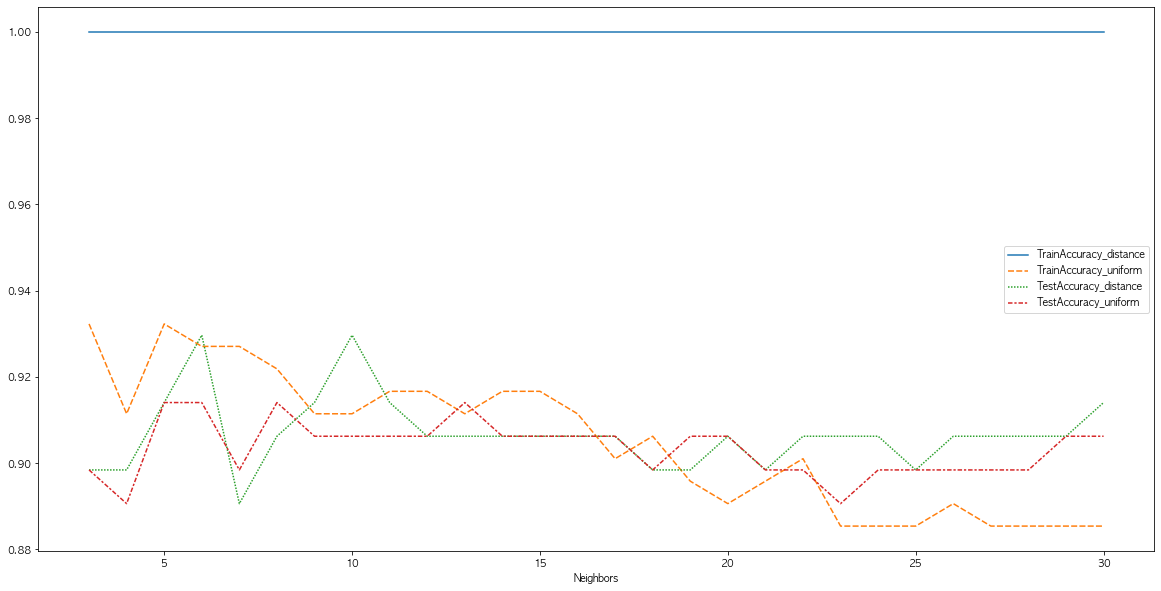

In [177]:
plt.figure(figsize=(20,10))
sns.lineplot(data = df_accuracy_weights_pivot)

- Distance는 과적합 되었기 때문에 weights를 uniform으로 지정한다

In [178]:
weights = 'uniform'

### 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [179]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(3,31)] * 2

para_metric = (['euclidean'])* 28 + (['manhattan']) * 28
### uniform 가중치와 distance

for(v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors= v_n_neighbors, metric = v_metric, weights= 'uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))



# 결과 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,3,euclidean,0.932,0.898
1,4,euclidean,0.911,0.891
2,5,euclidean,0.932,0.914
3,6,euclidean,0.927,0.914
4,7,euclidean,0.927,0.898
5,8,euclidean,0.922,0.914
6,9,euclidean,0.911,0.906
7,10,euclidean,0.911,0.906
8,11,euclidean,0.917,0.906
9,12,euclidean,0.917,0.906


<AxesSubplot: xlabel='Neighbors'>

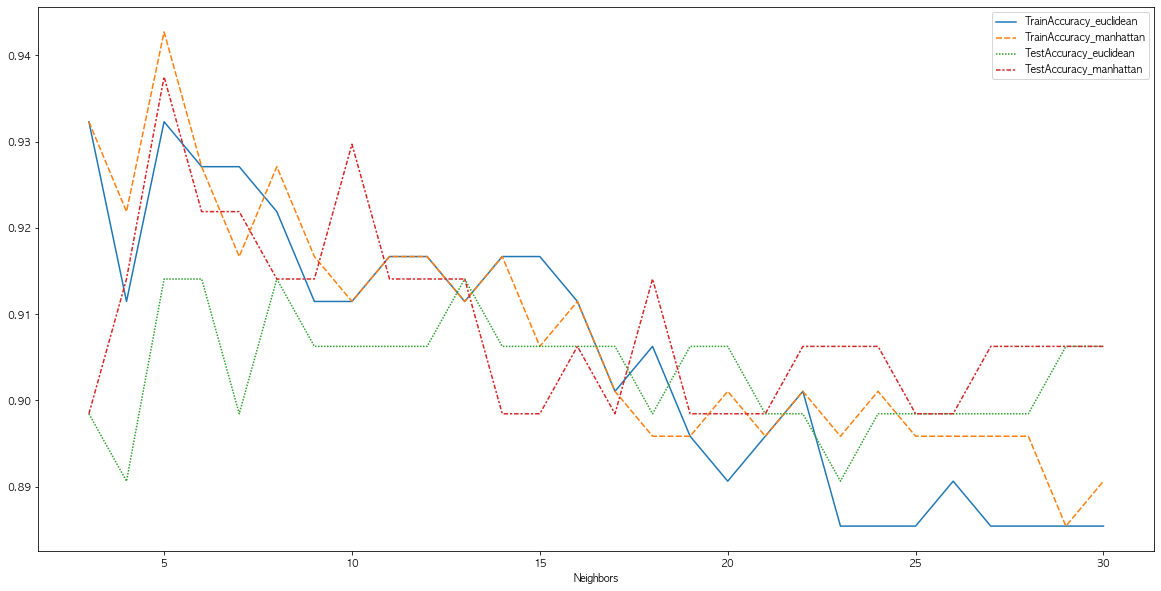

In [180]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index='Neighbors', columns= 'Metric', values= ['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)

df_accuracy_metric_pivot.columns = level0 + '_' + level1
df_accuracy_metric_pivot.head()

plt.figure(figsize=(20,10))
sns.lineplot(data = df_accuracy_metric_pivot)

### 결론 도출

In [182]:
# 최종 모델
knn_final = KNeighborsClassifier(n_neighbors= 8, weights='uniform', metric= 'manhattan')
knn_final.fit(df_train_x, df_train_y)
y_pred = knn_final.predict(df_test_x)
# train 모델 정확도
print("Accuracy on training set: {0:.3f}".format(knn_final.score(df_scaled_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {0:.3f}".format(knn_final.score(df_scaled_test_x, df_test_y)))
# Confusion Matrix
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)), "\n")
# 목표변수의 빈도 불균형: f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set: 0.401
Accuracy on test set: 0.242
Confusion Matrix: 
[[93  4]
 [ 7 24]] 

              precision    recall  f1-score   support

           0      0.930     0.959     0.944        97
           1      0.857     0.774     0.814        31

    accuracy                          0.914       128
   macro avg      0.894     0.866     0.879       128
weighted avg      0.912     0.914     0.913       128



1에 대한 recall은 0.774로 0(음성)에 대한 recall에 비해 낮은 것을 볼 수 있다.

변수 예측 후 값 비교

In [185]:
pred = knn_final.predict(df_raw_x)
(pred == df_raw_y).sum()

295